In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# load results
filepath = "/reproduce-finetuning/results/mrpc/results_n15.csv"
df = pd.read_csv(filepath, index_col="repetition")

In [3]:
df

,seed,accuracy,f1
repetition,,,
0,0,0.855392,0.900169
1,1,0.843137,0.890411
2,2,0.862745,0.905405
3,3,0.855392,0.899489
4,4,0.865196,0.904014
5,5,0.850490,0.894281
6,6,0.855392,0.899145
7,7,0.850490,0.895369
8,8,0.850490,0.895009


In [4]:
# compute stats
df.describe()

,seed,accuracy,f1
count,15.000000,15.000000,15.000000
mean,7.000000,0.853595,0.897800
std,4.472136,0.008310,0.006270
min,0.000000,0.838235,0.887755
25%,3.500000,0.848039,0.892924
50%,7.000000,0.855392,0.899145
75%,10.500000,0.860294,0.902179
max,14.000000,0.865196,0.907251


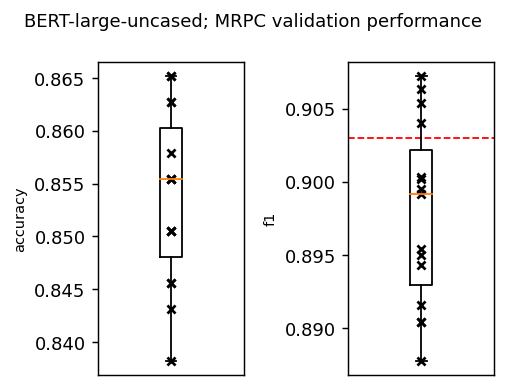

In [6]:
# plot results
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(4, 3), sharey=False, dpi=130)

ax2.axhline(0.903, color="red", linestyle="--", linewidth=1.0) # mean performance of https://arxiv.org/abs/2006.04884 (Table 1)

ax1.boxplot(df["accuracy"])
ax2.boxplot(df["f1"])

ax1.scatter([1] * len(df["accuracy"]), df["accuracy"], marker='x', color="black", s=20.0)
ax2.scatter([1] * len(df["f1"]), df["f1"], marker='x', color="black", s=20.0)

ax1.set_ylabel("accuracy", fontsize=8)
ax2.set_ylabel("f1", fontsize=8)

ax1.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax2.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

fig.suptitle("BERT-large-uncased; MRPC validation performance", fontsize=10)

plt.tight_layout();